In [1]:
import numpy as np
import pandas as pd
import pandasql as ps
import math
import itertools

#visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
import seaborn as sns

#

In [2]:
# Read data
df=pd.read_csv("data/train.csv")
df
    

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [3]:
df.shape

(3000888, 6)

In [4]:
df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
df['date']=pd.to_datetime(df['date'], format="%Y %m %d")
df.date

0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
3000883   2017-08-15
3000884   2017-08-15
3000885   2017-08-15
3000886   2017-08-15
3000887   2017-08-15
Name: date, Length: 3000888, dtype: datetime64[ns]

In [7]:
agg_df= df.groupby(['date', 'family']).agg({'sales': 'sum'}).reset_index().sort_values(['family', 'date'])

In [8]:
agg_df.head()

,date,family,sales
0,2013-01-01,AUTOMOTIVE,0.0
33,2013-01-02,AUTOMOTIVE,255.0
66,2013-01-03,AUTOMOTIVE,161.0
99,2013-01-04,AUTOMOTIVE,169.0
132,2013-01-05,AUTOMOTIVE,342.0


In [9]:
agg_df['family'].value_counts()

AUTOMOTIVE                    1684
HOME APPLIANCES               1684
SCHOOL AND OFFICE SUPPLIES    1684
PRODUCE                       1684
PREPARED FOODS                1684
POULTRY                       1684
PLAYERS AND ELECTRONICS       1684
PET SUPPLIES                  1684
PERSONAL CARE                 1684
MEATS                         1684
MAGAZINES                     1684
LIQUOR,WINE,BEER              1684
LINGERIE                      1684
LAWN AND GARDEN               1684
LADIESWEAR                    1684
HOME CARE                     1684
HOME AND KITCHEN II           1684
BABY CARE                     1684
HOME AND KITCHEN I            1684
HARDWARE                      1684
GROCERY II                    1684
GROCERY I                     1684
FROZEN FOODS                  1684
EGGS                          1684
DELI                          1684
DAIRY                         1684
CLEANING                      1684
CELEBRATION                   1684
BREAD/BAKERY        

In [10]:
agg_df.shape

(55572, 3)

In [11]:
agg_df['year'] =agg_df['date'].dt.year
agg_df['month'] = agg_df['date'].dt.month
agg_df['day'] = agg_df['date'].dt.day
agg_df['day_name'] = agg_df['date'].dt.day_name()

In [12]:
agg_df.head()

,date,family,sales,year,month,day,day_name
0,2013-01-01,AUTOMOTIVE,0.0,2013,1,1,Tuesday
33,2013-01-02,AUTOMOTIVE,255.0,2013,1,2,Wednesday
66,2013-01-03,AUTOMOTIVE,161.0,2013,1,3,Thursday
99,2013-01-04,AUTOMOTIVE,169.0,2013,1,4,Friday
132,2013-01-05,AUTOMOTIVE,342.0,2013,1,5,Saturday


In [13]:
total_sales_df= agg_df.pivot(index='date', columns='family', values='sales')
total_sales_df.head()

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,2.0,810.0,0.0,180.58900,0.0,186.0,143.0,71.09000,...,0.0,110.801000,25.0,0.0,0.0,42.637000,37.847000,0.0,0.0,0.000000
2013-01-02,255.0,0.0,207.0,72092.0,0.0,26246.31900,0.0,74629.0,23381.0,15754.50000,...,0.0,20871.464028,17204.0,0.0,0.0,13975.884938,5338.111976,0.0,0.0,1526.750002
2013-01-03,161.0,0.0,125.0,52105.0,0.0,18456.48002,0.0,55893.0,18001.0,11172.45500,...,0.0,16597.398113,12568.0,0.0,0.0,10674.393983,3591.388005,0.0,0.0,1094.310994
2013-01-04,169.0,0.0,133.0,54167.0,0.0,16721.96901,0.0,52064.0,18148.0,10143.20900,...,0.0,21625.963055,11303.0,0.0,0.0,10772.515038,4472.965990,0.0,0.0,1293.120995
2013-01-05,342.0,0.0,191.0,77818.0,0.0,22367.76108,0.0,70128.0,23082.0,13734.94501,...,0.0,20879.091050,16819.0,0.0,0.0,13475.009055,5830.073020,0.0,0.0,1245.637004


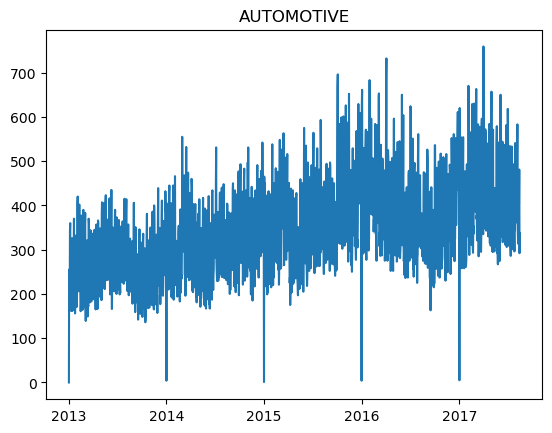

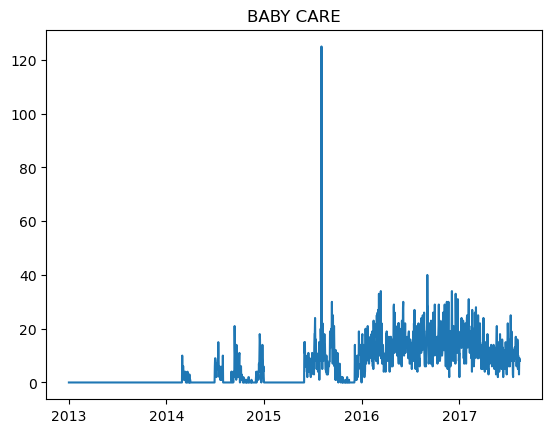

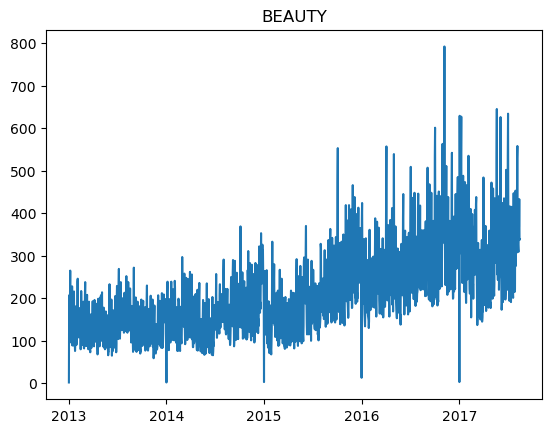

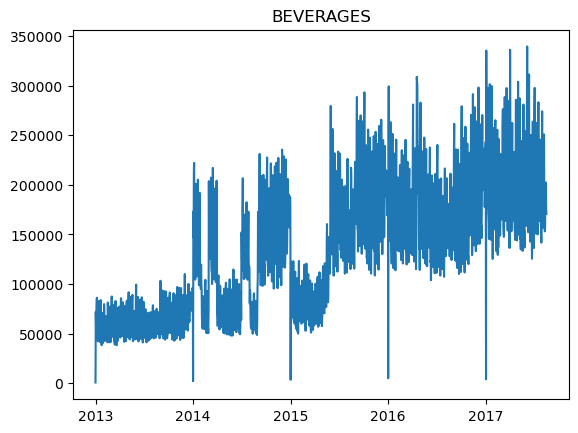

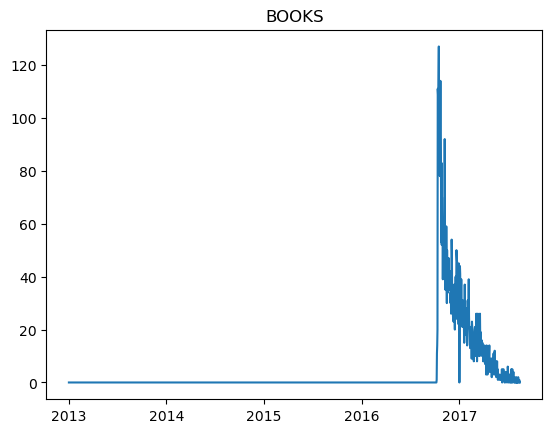

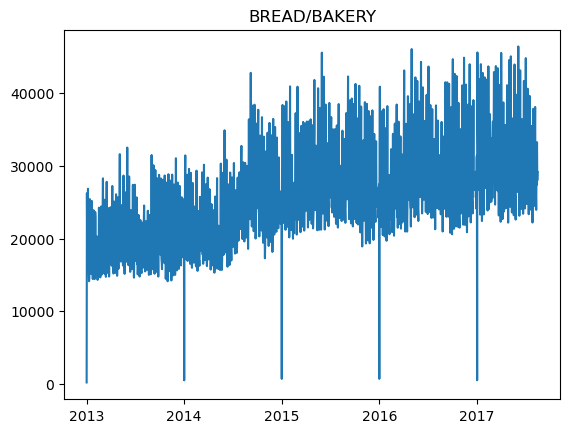

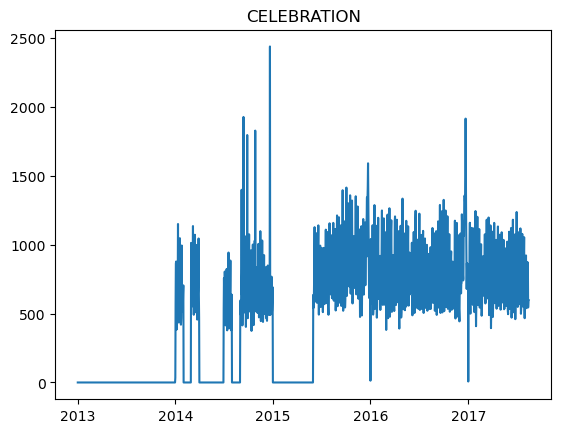

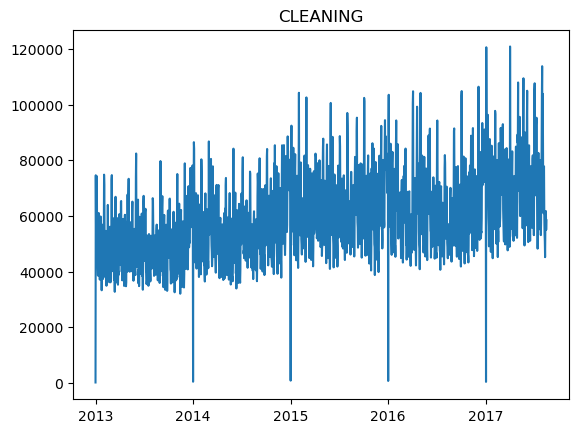

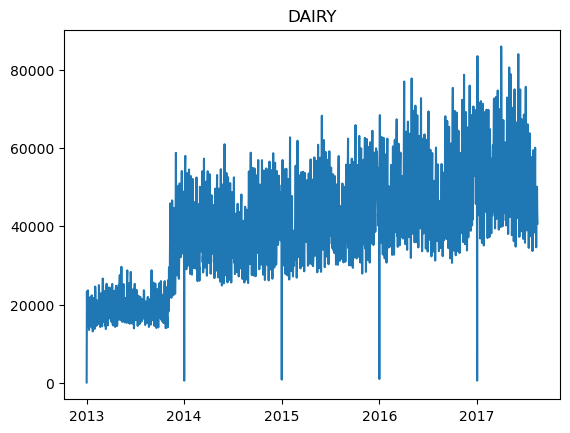

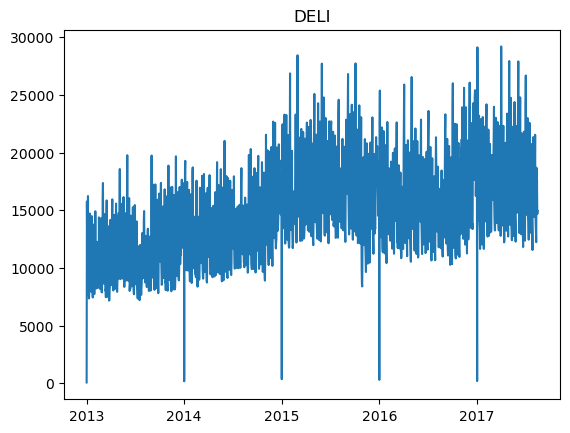

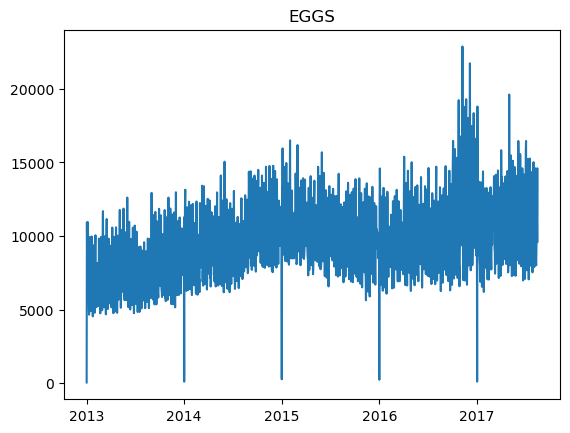

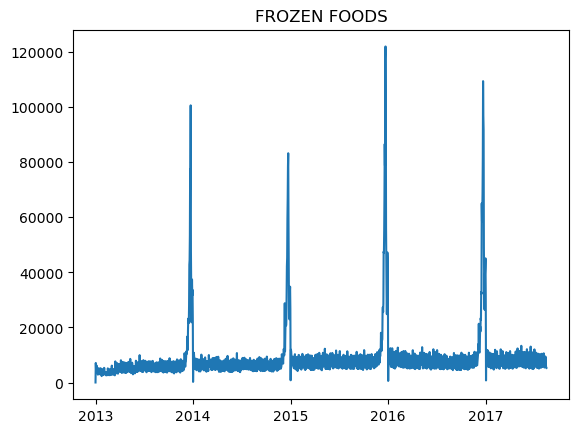

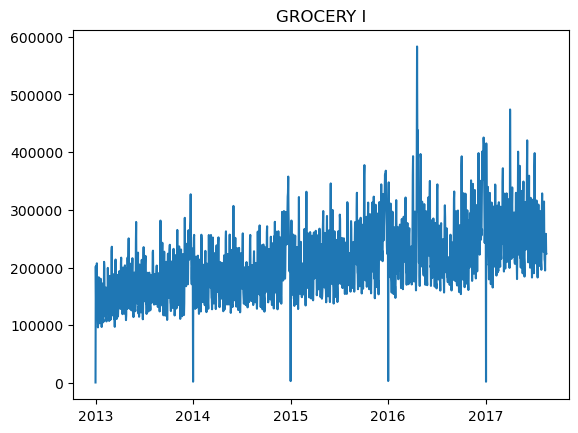

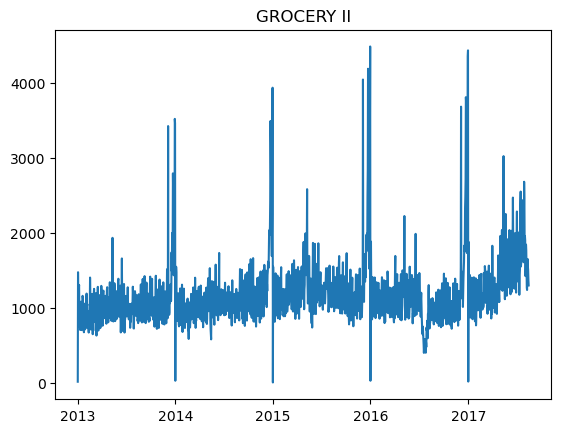

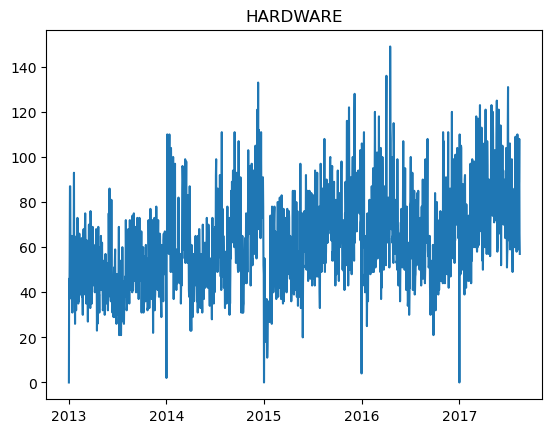

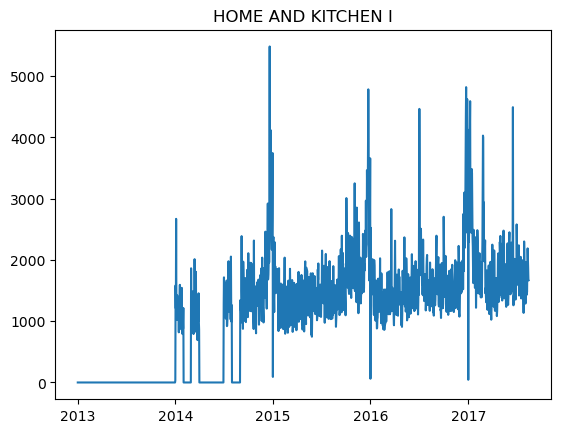

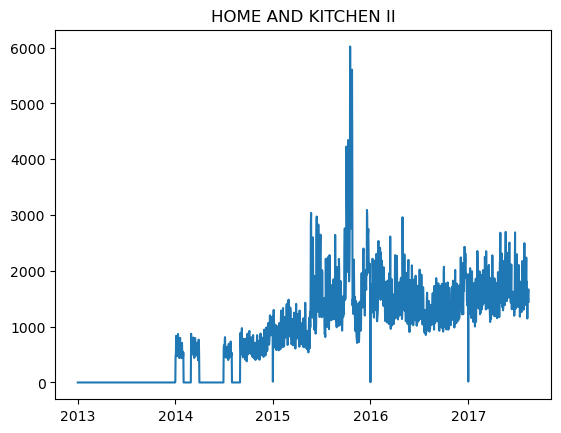

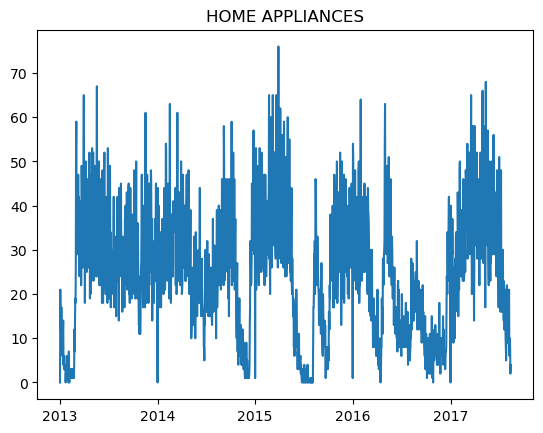

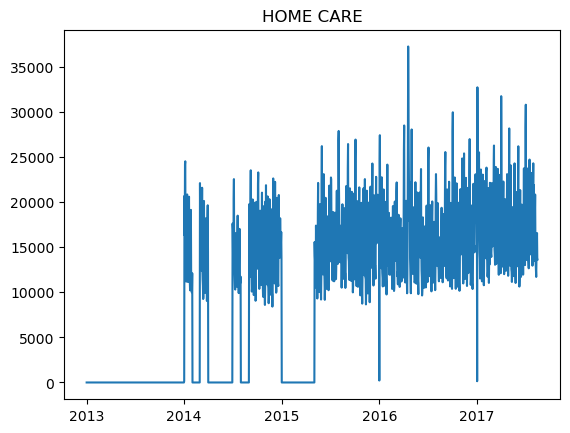

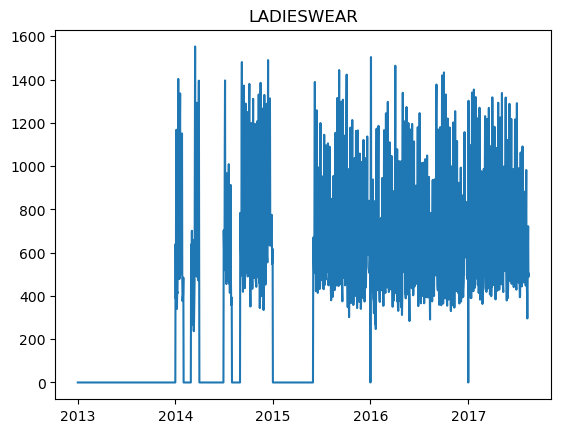

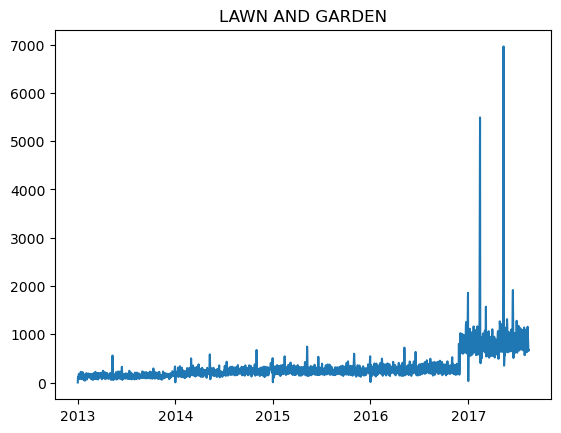

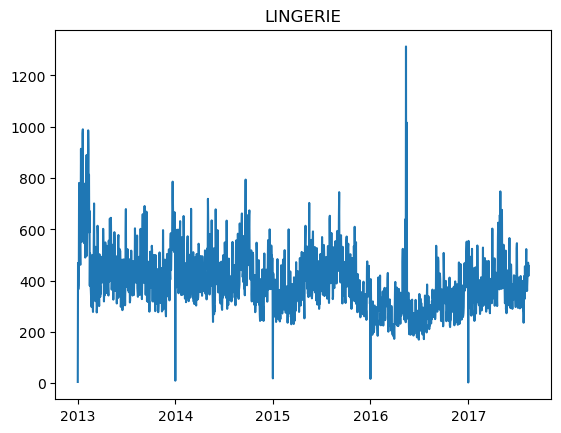

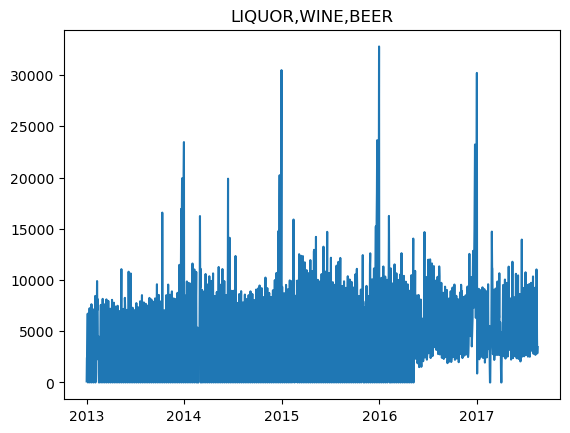

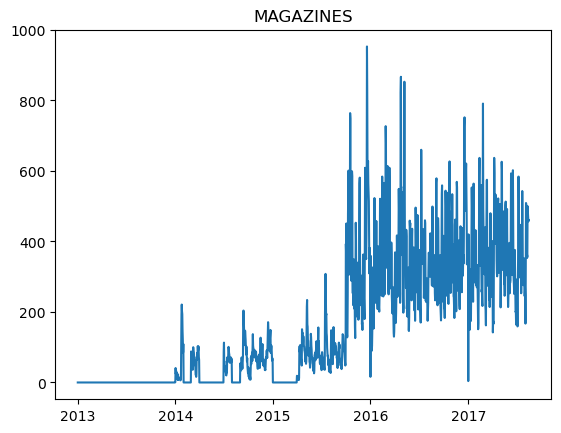

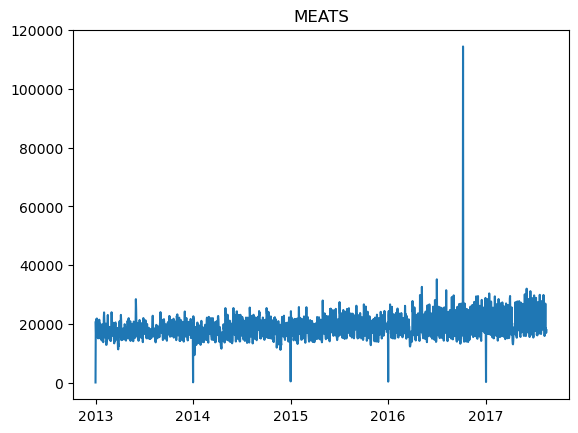

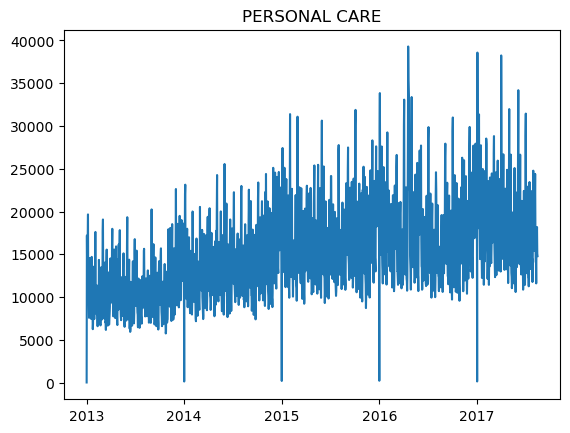

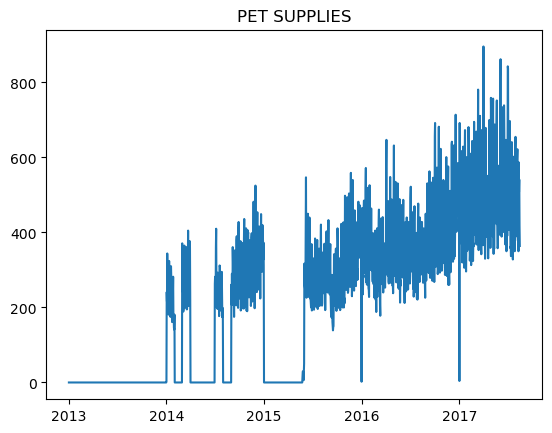

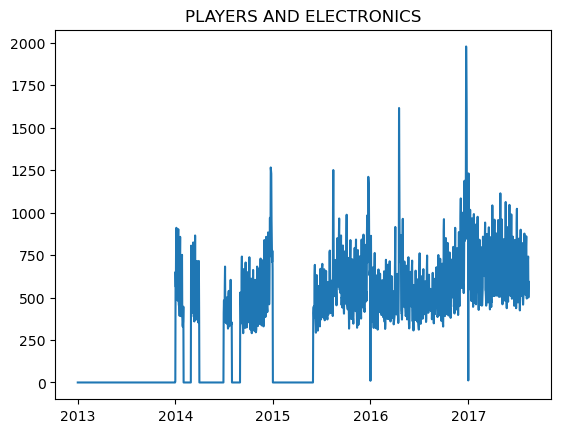

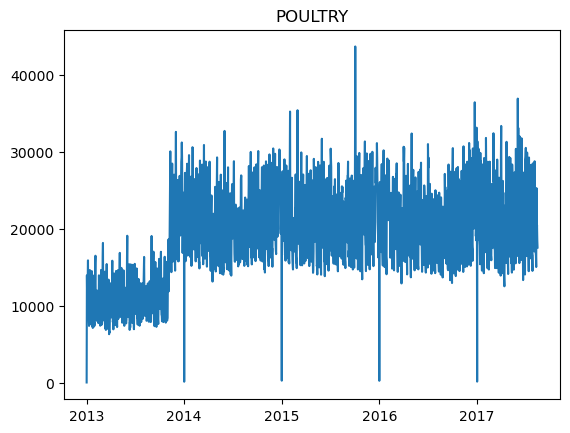

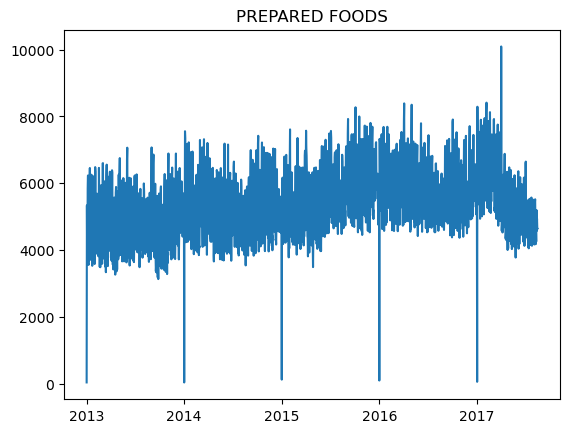

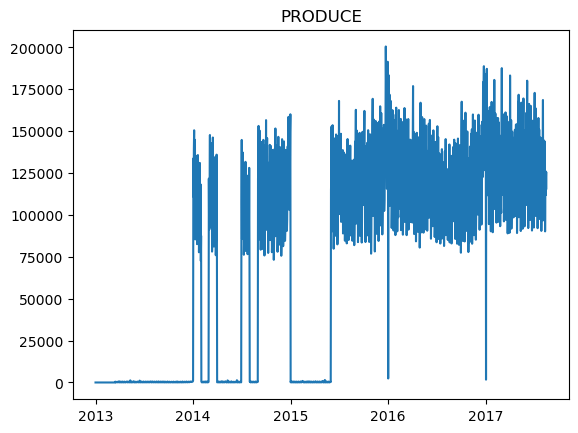

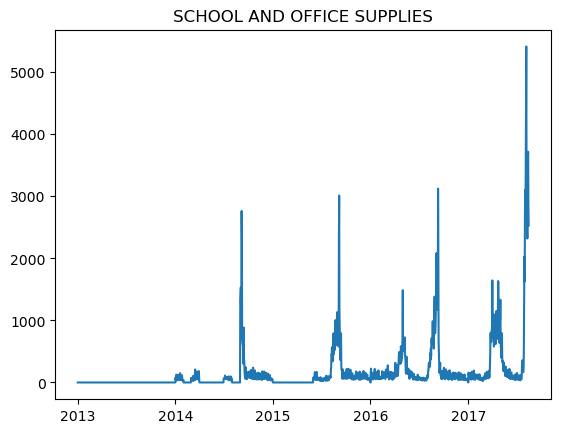

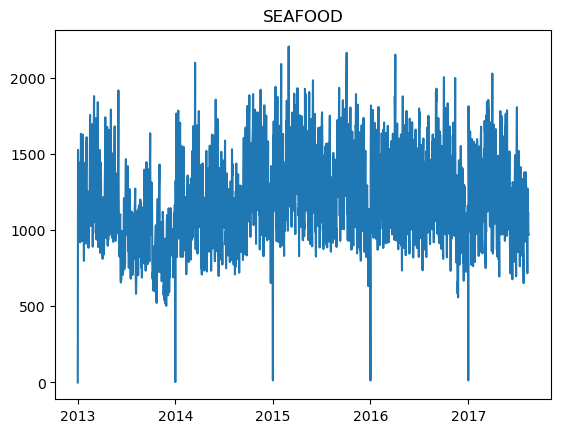

In [14]:
for column in total_sales_df.columns:
    plt.plot(total_sales_df[column])
    plt.title(column)
    plt.show()

In [15]:
total_sales_df = total_sales_df[total_sales_df.index>='2015-08-15']
total_sales_df.head()

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2015-08-15,454.0,18.0,251.0,217135.0,0.0,32509.90608,1157.0,75837.0,48578.0,19946.925,...,153.0,20403.940990,19398.0,370.0,1250.0,24718.795975,6854.544020,128147.17800,701.0,1507.242994
2015-08-16,413.0,11.0,313.0,208213.0,0.0,34851.87800,724.0,75824.0,50930.0,21178.461,...,157.0,20616.159980,21048.0,359.0,913.0,25480.778935,6640.393014,131493.92710,793.0,1448.716997
2015-08-17,289.0,14.0,175.0,149741.0,0.0,26361.76895,593.0,59718.0,38358.0,15755.025,...,125.0,16725.028985,14854.0,263.0,593.0,18549.113000,5212.498015,102769.59890,458.0,1166.222013
2015-08-18,295.0,10.0,166.0,132609.0,0.0,23915.94802,709.0,52749.0,33273.0,14119.251,...,102.0,15377.124025,13064.0,193.0,519.0,15722.331040,4758.126975,106468.22500,494.0,951.633993
2015-08-19,314.0,5.0,176.0,131368.0,0.0,23995.15200,599.0,51157.0,35760.0,13250.039,...,102.0,15654.345964,12581.0,257.0,535.0,16360.620083,5275.078985,132449.57997,545.0,996.733998


In [16]:
total_sales_df.isnull().sum()

family
AUTOMOTIVE                    0
BABY CARE                     0
BEAUTY                        0
BEVERAGES                     0
BOOKS                         0
BREAD/BAKERY                  0
CELEBRATION                   0
CLEANING                      0
DAIRY                         0
DELI                          0
EGGS                          0
FROZEN FOODS                  0
GROCERY I                     0
GROCERY II                    0
HARDWARE                      0
HOME AND KITCHEN I            0
HOME AND KITCHEN II           0
HOME APPLIANCES               0
HOME CARE                     0
LADIESWEAR                    0
LAWN AND GARDEN               0
LINGERIE                      0
LIQUOR,WINE,BEER              0
MAGAZINES                     0
MEATS                         0
PERSONAL CARE                 0
PET SUPPLIES                  0
PLAYERS AND ELECTRONICS       0
POULTRY                       0
PREPARED FOODS                0
PRODUCE                       0
S

In [17]:
total_sales_df.dtypes

family
AUTOMOTIVE                    float64
BABY CARE                     float64
BEAUTY                        float64
BEVERAGES                     float64
BOOKS                         float64
BREAD/BAKERY                  float64
CELEBRATION                   float64
CLEANING                      float64
DAIRY                         float64
DELI                          float64
EGGS                          float64
FROZEN FOODS                  float64
GROCERY I                     float64
GROCERY II                    float64
HARDWARE                      float64
HOME AND KITCHEN I            float64
HOME AND KITCHEN II           float64
HOME APPLIANCES               float64
HOME CARE                     float64
LADIESWEAR                    float64
LAWN AND GARDEN               float64
LINGERIE                      float64
LIQUOR,WINE,BEER              float64
MAGAZINES                     float64
MEATS                         float64
PERSONAL CARE                 float64
PET S

#### Let's group these different categories by the volume of data. The higher volume data the better for forecasting since you can forecast past the noise and end up with lower error bars. This will also let us visualize the forecasts on similar scales so that we can figure out if timeseries modeling will work for the categories since timeseries highly depends on seasonal data of a certain variation (addtitive, multiplicative).

### Average daily sales

In [18]:
avg_daily_sales= total_sales_df.apply(np.mean, axis=0).sort_values()
avg_daily_sales

family
BOOKS                              8.819178
BABY CARE                         11.828767
HOME APPLIANCES                   23.208219
HARDWARE                          70.212329
BEAUTY                           273.443836
SCHOOL AND OFFICE SUPPLIES       315.057534
MAGAZINES                        328.690411
LINGERIE                         343.776712
PET SUPPLIES                     381.498630
AUTOMOTIVE                       383.202740
LAWN AND GARDEN                  491.468493
PLAYERS AND ELECTRONICS          576.356164
LADIESWEAR                       626.308219
CELEBRATION                      770.869863
SEAFOOD                         1241.144082
GROCERY II                      1246.871233
HOME AND KITCHEN II             1560.601370
HOME AND KITCHEN I              1707.093151
LIQUOR,WINE,BEER                5157.082192
PREPARED FOODS                  5643.836873
FROZEN FOODS                    9828.314244
EGGS                           10069.275342
HOME CARE                

In [19]:
low, mid = np.percentile(total_sales_df.apply(np.mean, axis=0).sort_values(),[33,66])
low,mid

(539.005589041096, 10749.085863013705)

In [20]:
low_vol_columns=avg_daily_sales[avg_daily_sales<=low]
low_vol_columns

family
BOOKS                           8.819178
BABY CARE                      11.828767
HOME APPLIANCES                23.208219
HARDWARE                       70.212329
BEAUTY                        273.443836
SCHOOL AND OFFICE SUPPLIES    315.057534
MAGAZINES                     328.690411
LINGERIE                      343.776712
PET SUPPLIES                  381.498630
AUTOMOTIVE                    383.202740
LAWN AND GARDEN               491.468493
dtype: float64

In [21]:
low_vol_columns=list(avg_daily_sales[avg_daily_sales<=low].index)
low_vol_columns

['BOOKS',
 'BABY CARE',
 'HOME APPLIANCES',
 'HARDWARE',
 'BEAUTY',
 'SCHOOL AND OFFICE SUPPLIES',
 'MAGAZINES',
 'LINGERIE',
 'PET SUPPLIES',
 'AUTOMOTIVE',
 'LAWN AND GARDEN']

In [22]:
mid_vol_columns = avg_daily_sales[(avg_daily_sales>low) & (avg_daily_sales<mid)]
mid_vol_columns

family
PLAYERS AND ELECTRONICS      576.356164
LADIESWEAR                   626.308219
CELEBRATION                  770.869863
SEAFOOD                     1241.144082
GROCERY II                  1246.871233
HOME AND KITCHEN II         1560.601370
HOME AND KITCHEN I          1707.093151
LIQUOR,WINE,BEER            5157.082192
PREPARED FOODS              5643.836873
FROZEN FOODS                9828.314244
EGGS                       10069.275342
dtype: float64

In [23]:
mid_vol_columns= list(avg_daily_sales[(avg_daily_sales>low) & (avg_daily_sales<mid)].index)
mid_vol_columns

['PLAYERS AND ELECTRONICS',
 'LADIESWEAR',
 'CELEBRATION',
 'SEAFOOD',
 'GROCERY II',
 'HOME AND KITCHEN II',
 'HOME AND KITCHEN I',
 'LIQUOR,WINE,BEER',
 'PREPARED FOODS',
 'FROZEN FOODS',
 'EGGS']

In [24]:
high_vol_columns = avg_daily_sales[avg_daily_sales>=mid]
high_vol_columns

family
HOME CARE         15734.363014
DELI              16222.121542
PERSONAL CARE     17091.286301
MEATS             19328.739759
POULTRY           21032.815449
BREAD/BAKERY      28520.339634
DAIRY             47031.135616
CLEANING          64159.212329
PRODUCE          123782.004787
BEVERAGES        177660.023288
GROCERY I        240048.180785
dtype: float64

In [25]:
high_vol_columns = list(avg_daily_sales[avg_daily_sales>=mid].index)
high_vol_columns

['HOME CARE',
 'DELI',
 'PERSONAL CARE',
 'MEATS',
 'POULTRY',
 'BREAD/BAKERY',
 'DAIRY',
 'CLEANING',
 'PRODUCE',
 'BEVERAGES',
 'GROCERY I']

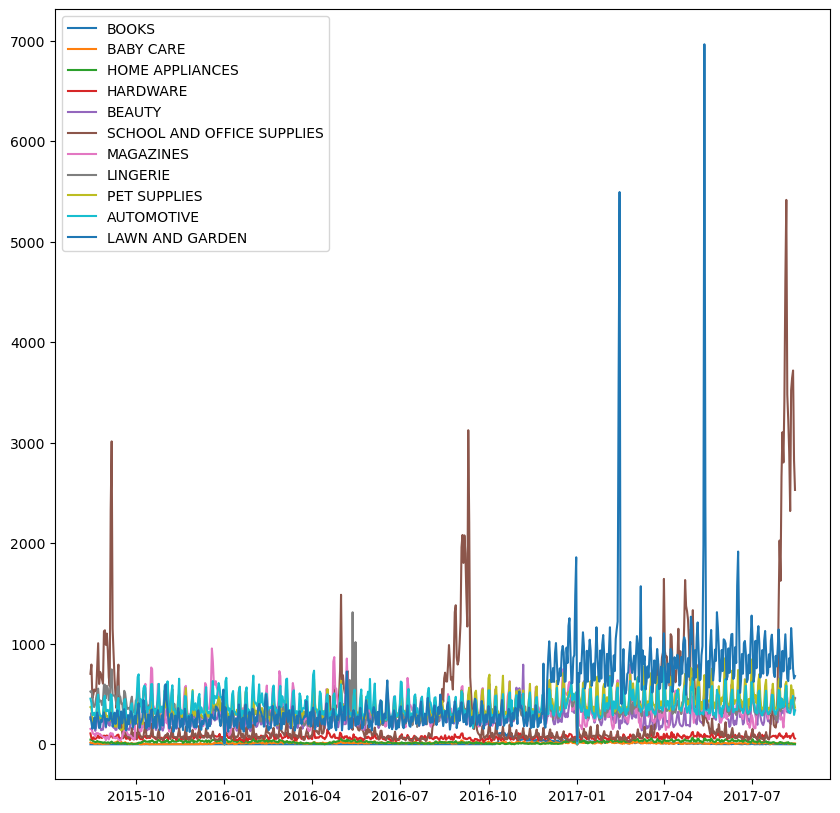

In [26]:
plt.figure(figsize=(10,10))
plt.plot(total_sales_df[low_vol_columns])
plt.legend(low_vol_columns, loc='best')
plt.show()

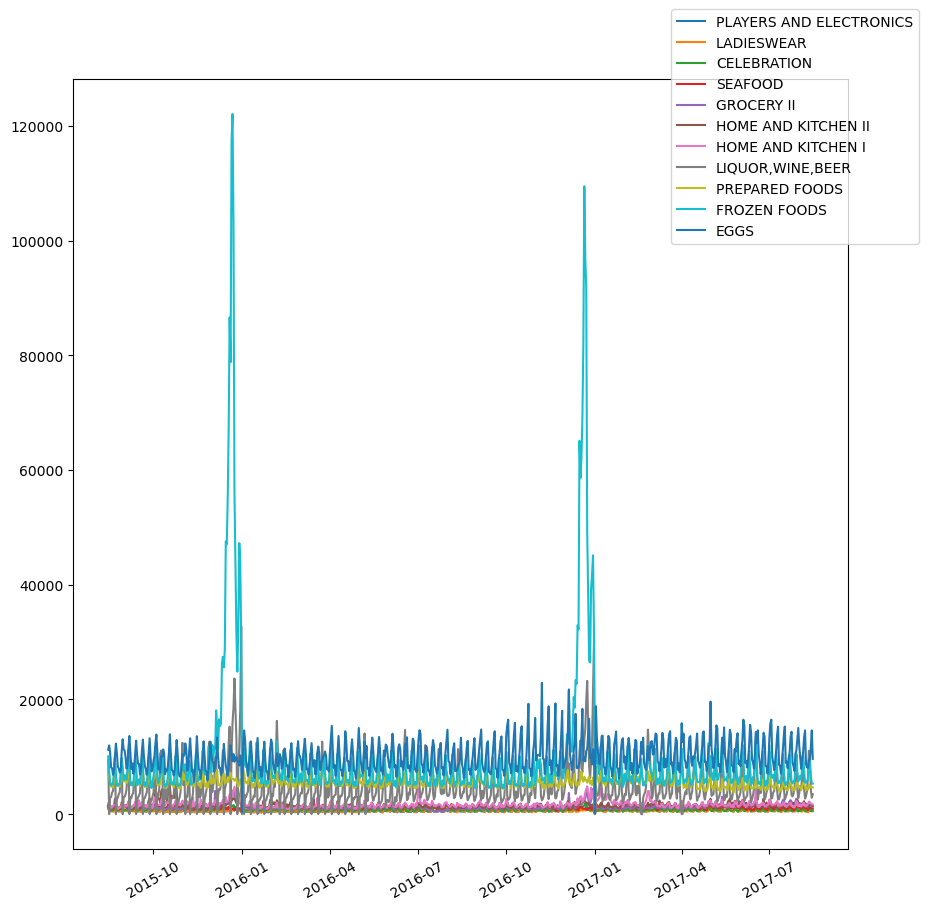

In [27]:
plt.figure(figsize=(10,10))
plt.plot(total_sales_df[mid_vol_columns])
plt.legend(mid_vol_columns, loc='best', bbox_to_anchor=(1.1, 1.1))
plt.xticks(rotation=30)
plt.show()

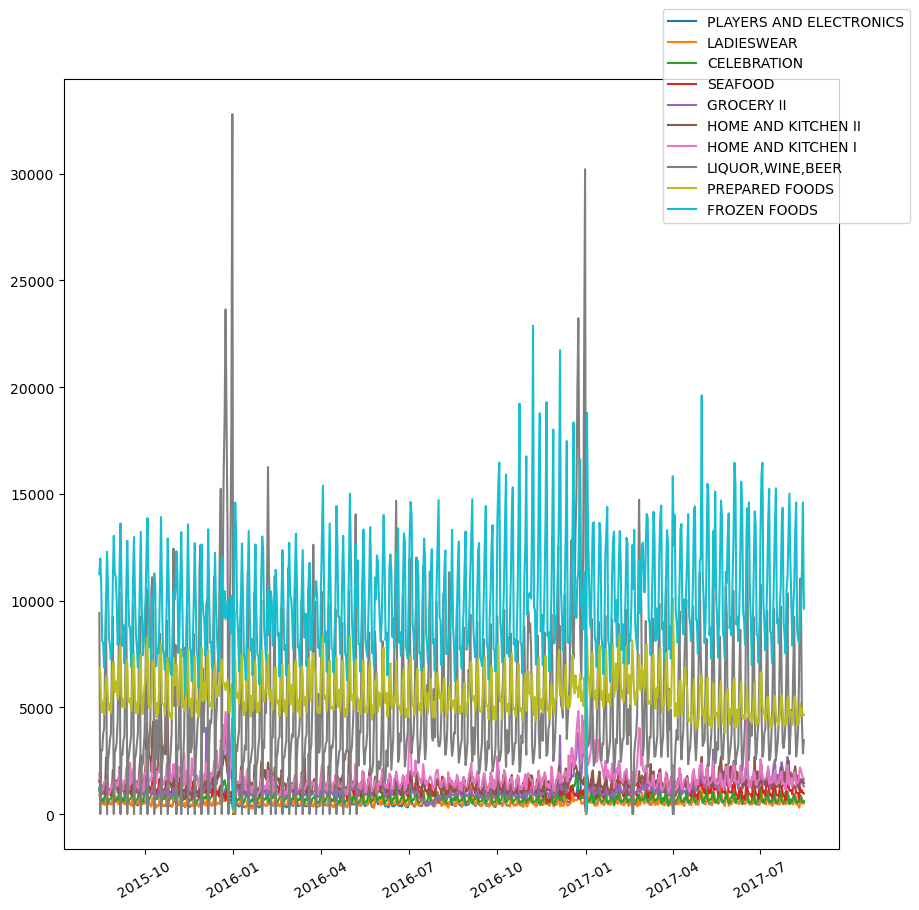

In [28]:
plt.figure(figsize=(10,10))
plt.plot(total_sales_df[mid_vol_columns].drop(columns='FROZEN FOODS'))
plt.legend(mid_vol_columns, loc='best', bbox_to_anchor=(1.1, 1.1))
plt.xticks(rotation=30)
plt.show()

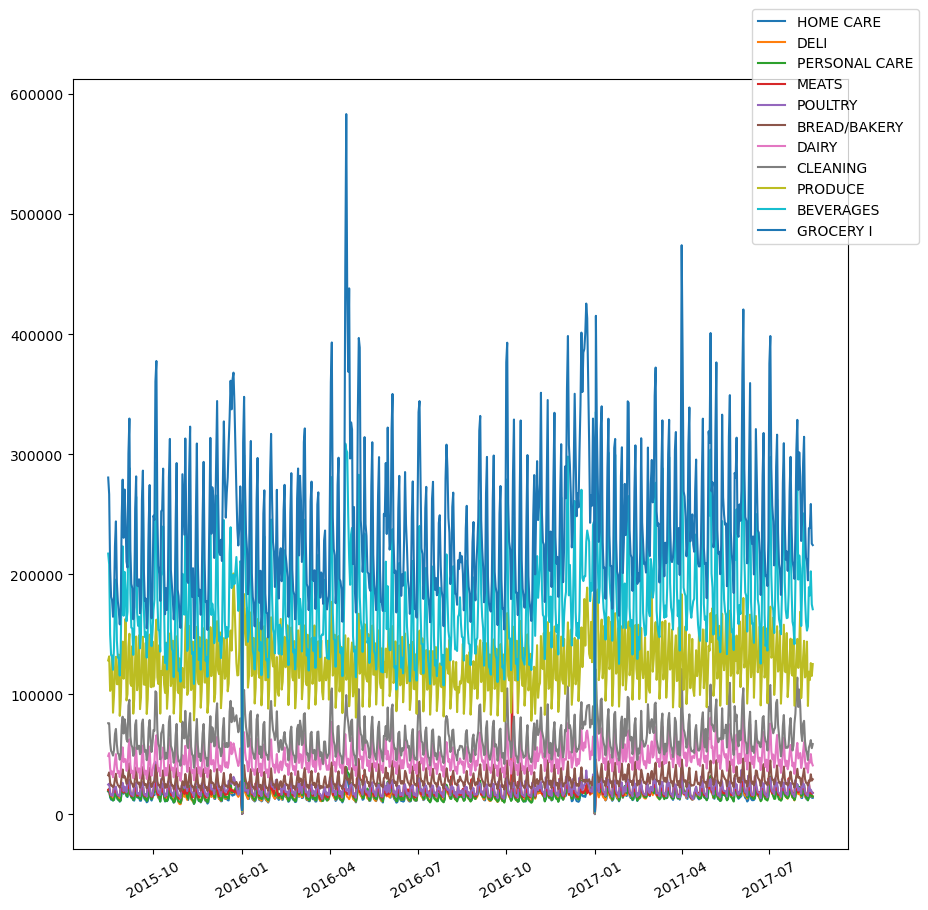

In [29]:
plt.figure(figsize=(10,10))
plt.plot(total_sales_df[high_vol_columns])
plt.legend(high_vol_columns, loc='best', bbox_to_anchor=(1.1, 1.1))
plt.xticks(rotation=30)
plt.show()

In [30]:
### Let's test things out with a high volume metric first to see if things work. Let's test with "PRODUCE."

In [31]:
df2= total_sales_df['PRODUCE'].reset_index()
df2

,date,PRODUCE
0,2015-08-15,128147.17800
1,2015-08-16,131493.92710
2,2015-08-17,102769.59890
3,2015-08-18,106468.22500
4,2015-08-19,132449.57997
...,...,...
725,2017-08-11,118738.14300
726,2017-08-12,111788.35090
727,2017-08-13,125923.80240
728,2017-08-14,115257.59598


In [34]:

#date libraries
from dateutil import parser
from datetime import datetime, timedelta, date
import holidays

#adding holiday data

holiday = pd.DataFrame([])

ecuador_holidays = holidays.EC()  # this is a dict
# the below is the same, but takes a string:
ecuador_holidays = holidays.country_holidays('EC')  # this is a dict


for date_, name in sorted(holidays.EC(years=[2015,2016,2017,2018]).items()):
    holiday = pd.concat([holiday, pd.DataFrame({'ds': date_, 'holiday': "EC-Holidays", 'lower_window': -2, 'upper_window': 1}, index=[0])], ignore_index=True) 

holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
holiday.head()

,ds,holiday,lower_window,upper_window
0,2015-01-01,EC-Holidays,-2,1
1,2015-02-16,EC-Holidays,-2,1
2,2015-02-17,EC-Holidays,-2,1
3,2015-04-03,EC-Holidays,-2,1
4,2015-05-01,EC-Holidays,-2,1


In [36]:
#prophet library
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

In [37]:
#Variables

forecast_start_dt = date(2017,7,1) #data set ends of (2017,8,15)
forecast_start_date = (forecast_start_dt).strftime("%Y-%m-%d") 
print(forecast_start_date)

2017-07-01


In [38]:
#setting variables
feature = 'PRODUCE'
prediction_days = 30

In [50]:
df = total_sales_df[[feature]].reset_index()
df.head()

family,date,PRODUCE
0,2015-08-15,128147.17800
1,2015-08-16,131493.92710
2,2015-08-17,102769.59890
3,2015-08-18,106468.22500
4,2015-08-19,132449.57997


In [51]:
#PROPHET MODEL

df_copy = df.copy()
df_copy = df_copy.rename(columns={'date': 'ds', feature: 'y'})



In [52]:
df_copy['ds']

0     2015-08-15
1     2015-08-16
2     2015-08-17
3     2015-08-18
4     2015-08-19
         ...    
725   2017-08-11
726   2017-08-12
727   2017-08-13
728   2017-08-14
729   2017-08-15
Name: ds, Length: 730, dtype: datetime64[ns]

In [49]:
df['PRODUCE']

0      128147.17800
1      131493.92710
2      102769.59890
3      106468.22500
4      132449.57997
           ...     
725    118738.14300
726    111788.35090
727    125923.80240
728    115257.59598
729    125108.97100
Name: PRODUCE, Length: 730, dtype: float64

In [54]:
df_copy['y']

0      128147.17800
1      131493.92710
2      102769.59890
3      106468.22500
4      132449.57997
           ...     
725    118738.14300
726    111788.35090
727    125923.80240
728    115257.59598
729    125108.97100
Name: y, Length: 730, dtype: float64

In [60]:

train_set = df_copy[(df_copy['ds'] < forecast_start_date) ]

m = Prophet()

m.fit(train_set)

future = m.make_future_dataframe(periods=prediction_days)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

12:39:41 - cmdstanpy - INFO - Chain [1] start processing
12:39:41 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
predicted_df.head(10)

,ds,yhat
684,2017-07-01,144519.976818
685,2017-07-02,155243.532822
686,2017-07-03,122290.056398
687,2017-07-04,127548.387836
688,2017-07-05,160158.574353
689,2017-07-06,102572.430711
690,2017-07-07,115921.606317
691,2017-07-08,144767.091486
692,2017-07-09,155490.647490
693,2017-07-10,122537.171066


In [62]:
df_copy = df.copy()
df_copy.columns = ['ds', 'ytrue']
predicted_df = predicted_df.merge(df_copy)

In [63]:
predicted_df 

,ds,yhat,ytrue
0,2017-07-01,144519.976818,155487.63090
1,2017-07-02,155243.532822,172890.13860
2,2017-07-03,122290.056398,130389.19902
3,2017-07-04,127548.387836,131534.54802
4,2017-07-05,160158.574353,163804.33003
5,2017-07-06,102572.430711,99395.60498
6,2017-07-07,115921.606317,114346.57410
7,2017-07-08,144767.091486,139294.77300
8,2017-07-09,155490.647490,156633.92050
9,2017-07-10,122537.171066,118856.99105


In [64]:
def mape(actual, pred): 
    '''
    Mean Absolute Percentage Error (MAPE) Function
    
    input: list/series for actual values and predicted values
    output: mape value 
    '''
    actual= np.array(actual)
    pred = np.array(pred)
    maep=  np.mean(np.abs((actual - pred) / actual)) * 100
    return maep

In [65]:
mape(predicted_df['ytrue'], predicted_df['yhat'])

6.211652166584692

In [68]:
100-6.211 #The ccauracy of the model

93.789

### Cross Validation with Prophet
Find the "best" parameters by testing over various periods of time with those parameters (cross-validation).

In [69]:
df_cv=cross_validation(m, initial='365 days', period='30 days', horizon='30 days')

  0%|          | 0/10 [00:00<?, ?it/s]

13:27:12 - cmdstanpy - INFO - Chain [1] start processing
13:27:12 - cmdstanpy - INFO - Chain [1] done processing
13:27:13 - cmdstanpy - INFO - Chain [1] start processing
13:27:13 - cmdstanpy - INFO - Chain [1] done processing
13:27:13 - cmdstanpy - INFO - Chain [1] start processing
13:27:13 - cmdstanpy - INFO - Chain [1] done processing
13:27:13 - cmdstanpy - INFO - Chain [1] start processing
13:27:13 - cmdstanpy - INFO - Chain [1] done processing
13:27:14 - cmdstanpy - INFO - Chain [1] start processing
13:27:14 - cmdstanpy - INFO - Chain [1] done processing
13:27:14 - cmdstanpy - INFO - Chain [1] start processing
13:27:14 - cmdstanpy - INFO - Chain [1] done processing
13:27:14 - cmdstanpy - INFO - Chain [1] start processing
13:27:14 - cmdstanpy - INFO - Chain [1] done processing
13:27:15 - cmdstanpy - INFO - Chain [1] start processing
13:27:15 - cmdstanpy - INFO - Chain [1] done processing
13:27:15 - cmdstanpy - INFO - Chain [1] start processing
13:27:15 - cmdstanpy - INFO - Chain [1]

In [70]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,4.091322e+08,20227.016126,13048.367362,0.089434,0.066173,0.095573,0.800000
1,4 days,2.679568e+08,16369.386378,11099.347148,0.079570,0.057964,0.083379,0.803448
2,5 days,1.407346e+08,11863.159477,8892.101171,0.067735,0.057521,0.069780,0.865517
3,6 days,1.260058e+08,11225.229967,9218.594467,0.071323,0.069465,0.073305,0.868966
4,7 days,9.581297e+07,9788.410158,8412.410101,0.066292,0.069136,0.067086,0.934483
5,8 days,7.636104e+07,8738.480504,7712.098671,0.061226,0.063937,0.061105,0.968966
6,9 days,6.176827e+07,7859.278924,6627.507376,0.055310,0.044510,0.054103,0.965517
7,10 days,4.963232e+07,7045.020800,5439.143770,0.047288,0.037678,0.045579,0.965517
8,11 days,7.911898e+07,8894.885252,6730.241808,0.054987,0.041132,0.053789,0.934483
9,12 days,8.363312e+07,9145.114505,6723.039756,0.052309,0.048565,0.052026,0.931034
